<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/TensorFlow/blob/master/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
rand_a=np.random.uniform(0, 100, size=(5,5))
rand_b=np.random.uniform(0, 100, size=(5,1))

In [6]:
rand_a


array([[89.69529151, 96.7836252 , 11.57875074, 51.04299332, 42.41070898],
       [64.56761823, 65.91279301, 12.2388343 , 84.17215916, 64.36429159],
       [ 6.69330817, 24.37390448, 24.09607225, 26.48200603, 76.34204189],
       [66.9860843 , 38.33434712, 94.7243828 , 79.987202  , 52.78242548],
       [14.39089379, 29.51965577, 52.25281233, 32.17837249, 50.50466747]])

In [7]:
rand_b

array([[75.16904149],
       [34.25785441],
       [57.0794147 ],
       [13.06811325],
       [78.94038612]])

In [0]:
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)

In [0]:
tf.InteractiveSession()
init=tf.global_variables_initializer()

In [0]:
add_op=a+b

In [0]:
mul_op=a*b

In [12]:
with tf.Session() as session:
  add_result=session.run(add_op, feed_dict={a:rand_a, b:rand_b})
  print(add_result)
  
  print('\n')
  
  mul_result=session.run(mul_op, feed_dict={a:rand_a, b:rand_b})
  print(mul_result)
  
  

[[164.86433  171.95267   86.747795 126.212036 117.57976 ]
 [ 98.82547  100.170654  46.49669  118.43001   98.62215 ]
 [ 63.772724  81.45332   81.17549   83.56142  133.42145 ]
 [ 80.0542    51.40246  107.792496  93.05532   65.85054 ]
 [ 93.331276 108.46004  131.19319  111.11876  129.44505 ]]


[[6742.309   7275.1323   870.36365 3836.853   3187.9724 ]
 [2211.948   2258.031    419.2762  2883.5576  2204.9824 ]
 [ 382.0501  1391.2483  1375.3898  1511.5774  4357.559  ]
 [ 875.3817   500.95758 1237.8689  1045.2819   689.7667 ]
 [1136.0227  2330.293   4124.857   2540.173   3986.858  ]]


### ANN Construction using tensor Flow

In [0]:
tf.reset_default_graph()

In [0]:
n_features=10
n_dense=3

In [0]:
x=tf.placeholder(tf.float32, shape=(None, n_features))

In [0]:
w=tf.Variable(tf.random_normal([n_features, n_dense]))
b=tf.Variable(tf.random_normal([n_dense]))

In [42]:
wx=tf.matmul(x, w)
wx

<tf.Tensor 'MatMul:0' shape=(?, 3) dtype=float32>

In [0]:
z=tf.add(wx,b)

In [0]:
a=tf.sigmoid(z)

In [0]:
init=tf.global_variables_initializer()

In [51]:
sess = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
with tf.Session() as sess:
  sess.run(init)
  out_layer=sess.run(a, feed_dict={x : np.random.random([1, n_features])})

In [53]:
out_layer

array([[0.30040544, 0.93228984, 0.8098548 ]], dtype=float32)

### Linear Regression

In [0]:
x_train=np.linspace(0,10, 10)+ np.random.uniform(-1.5, 1.5, 10)
y_train=np.linspace(0,10, 10)+ np.random.uniform(-1.5, 1.5, 10)


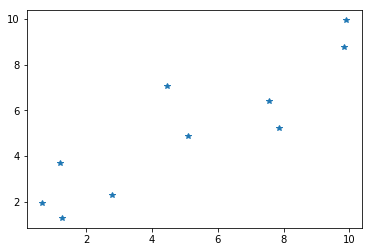

In [55]:
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, '*')

In [56]:
np.random.rand(2)

array([0.31984058, 0.66990099])

In [0]:
m=tf.Variable(0.32)
c=tf.Variable(0.67)

In [0]:
error=0

for x, y in zip(x_train, y_train):
  y_hat=x*m+c
  error+=(y-y_hat)**2

In [59]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
init=tf.global_variables_initializer()

In [0]:
with tf.Session() as session:
  session.run(init)
  learning=100
  for i in range(learning):
    session.run(train)
  pred_slope, pred_intercept=session.run([m, c])

In [83]:
pred_slope, pred_intercept

(0.7843203, 1.0583988)

In [0]:
x_test=np.linspace(0,10,10)+np.random.uniform(-0.5,1.5,10)
y_pred=pred_slope*x_test + pred_intercept

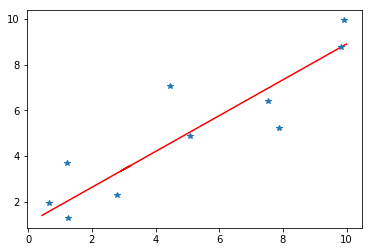

In [85]:
plt.plot(x_test, y_pred, 'r')
plt.plot(x_train, y_train, '*')